In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [18]:
dengue_ph = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/dengue.csv')

# from google.colab import drive
# drive.mount('/content/drive/MyDrive/Colab Notebooks/dataset/dengue.csv')

In [19]:
dengue_ph

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [20]:
dengue_ph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [21]:
dengue_ph['Month'] = dengue_ph['Month'].astype('category')
dengue_ph['Year'] = dengue_ph['Year'].astype('category')
dengue_ph['Region'] = dengue_ph['Region'].astype('category')

In [22]:
dengue_ph.dtypes

,0
Month,category
Year,category
Region,category
Dengue_Cases,int64
Dengue_Deaths,int64


In [37]:
dengue_ph['Region'].unique()

['Region I', 'Region II', 'Region III', 'Region IV-A', 'Region IV-B', ..., 'Region XII', 'Region XIII', 'NCR', 'CAR', 'BARMM']
Length: 17
Categories (17, object): ['BARMM', 'CAR', 'NCR', 'Region I', ..., 'Region X', 'Region XI',
                          'Region XII', 'Region XIII']

In [38]:
NCR_dengue = dengue_ph[dengue_ph['Region'] == 'NCR']


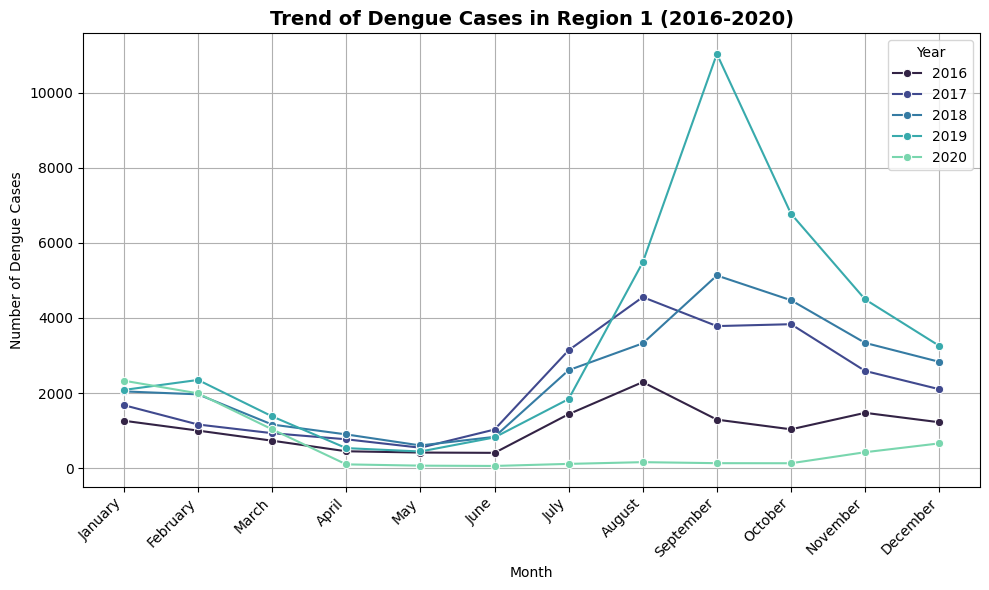

In [142]:
month_order = ['January','February','March','April', 'May','June', 'July',
               'August', 'September', 'October', 'November', 'December']

NCR_dengue['Month'] = pd.Categorical(NCR_dengue['Month'], categories = month_order, ordered = True)

plt.figure(figsize=(10,6))
sns.lineplot(x = 'Month', y = 'Dengue_Cases', hue = 'Year', data = NCR_dengue, marker ='o',palette="mako")
plt.title('Trend of Dengue Cases in Region 1 (2016-2020)', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h1>Insight</h1>



In [71]:
NCR_2019 = dengue_ph[(dengue_ph['Region'] == 'NCR') & (dengue_ph['Year'] == 2019)]

In [82]:
NCR_Death = NCR_2019.groupby(['Month'])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

In [83]:
NCR_Death

,Month,Dengue_Deaths,Dengue_Cases
0,April,4,532
1,August,36,5481
2,December,15,3257
3,February,9,2348
4,January,9,2082
5,July,14,1839
6,June,2,817
7,March,4,1377
8,May,3,442
9,November,11,4494


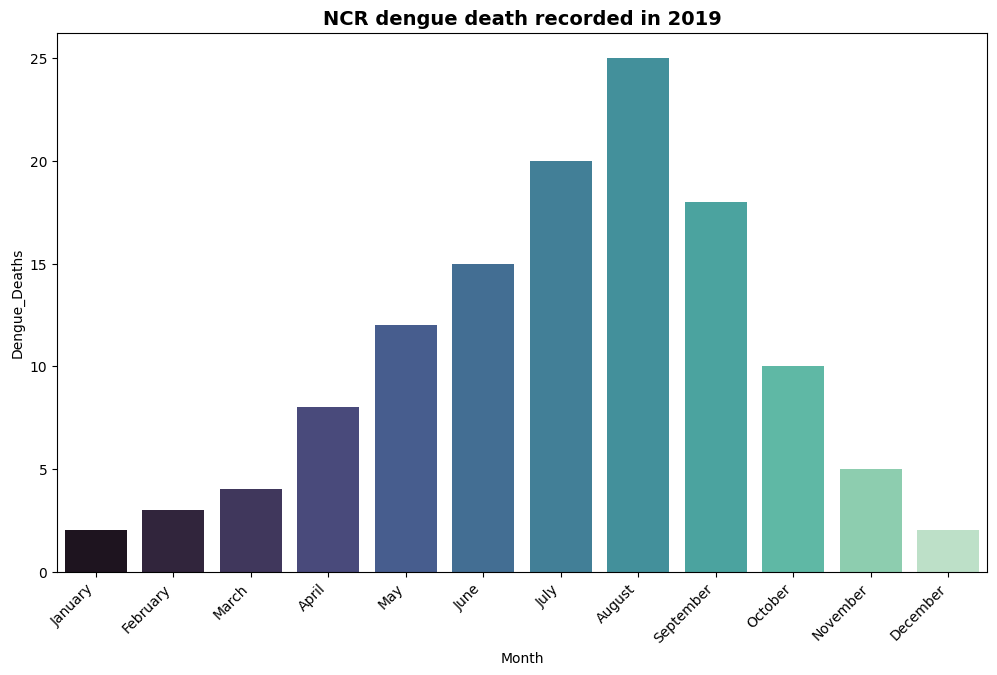

In [136]:
plt.figure(figsize=(12,7))
sns.barplot(
    data=NCR_2019,
    x='Month',
    y='Dengue_Deaths',
    palette='mako'
)
plt.xlabel('Month')
plt.ylabel('Dengue_Deaths')
plt.title('NCR dengue death recorded in 2019', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

In [139]:
R_IV_A_dengue = dengue_ph[dengue_ph['Region'] == 'Region IV-A']

In [140]:
R_IV_A_dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
180,January,2016,Region IV-A,2993,14
181,February,2016,Region IV-A,2035,5
182,March,2016,Region IV-A,1327,9
183,April,2016,Region IV-A,838,1
184,May,2016,Region IV-A,714,1
185,June,2016,Region IV-A,778,4
186,July,2016,Region IV-A,2270,6
187,August,2016,Region IV-A,3218,2
188,September,2016,Region IV-A,3454,28
189,October,2016,Region IV-A,3175,20


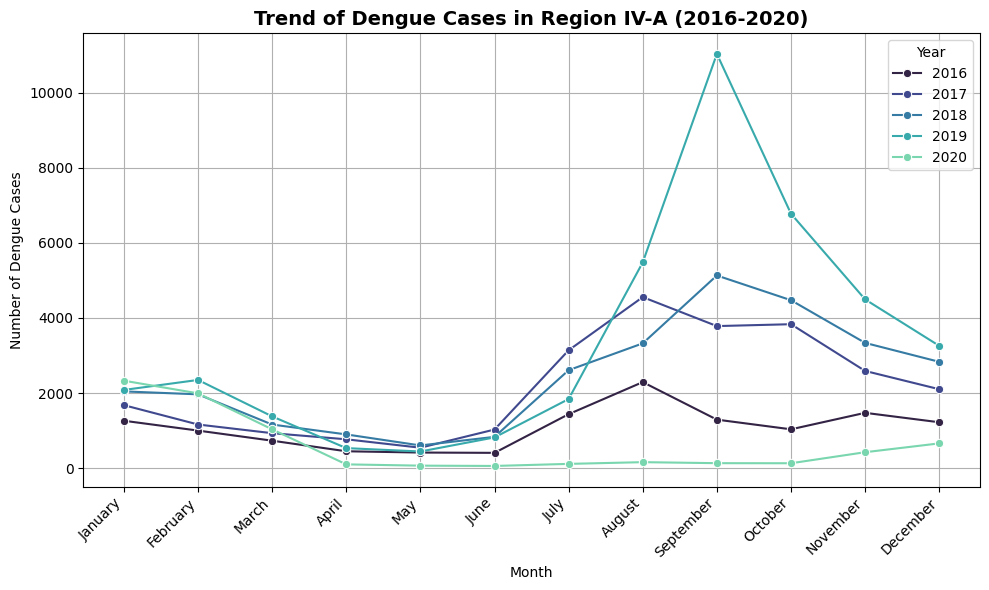

In [146]:
R_IV_A_dengue['Month'] = pd.Categorical(R_IV_A_dengue['Month'], categories = month_order, ordered = True)

plt.figure(figsize=(10,6))
sns.lineplot(x = 'Month', y = 'Dengue_Cases', hue = 'Year', data = NCR_dengue, marker ='o',palette="mako")
plt.title('Trend of Dengue Cases in Region IV-A (2016-2020)', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()